# 1. Introduction

With technology dominating the modern world; the app industry has become a high thriving. New apps are coming to the market every while. Indeed, app usage is still growing at a steady rate, but some are higher than others. There are different demands for different apps based on several features. Data science potentials can be utilized to drive app-making businesses and app developers to the right road. 

# 2. Dataset Description

Google Play Store is a big digital distribution service that provides apps supported by Android-certified devices and Chrome OS. We found a dataset on Kaggle that contains data of 10k Play Store apps for analyzing the Android market. The dataset has 13 columns -which will be shown in the following subsection- and 10842 rows. It is aiming to use these apps’ statistics to predict which apps are more likely to be installed or get a high rate.

## 2.1. Sneak Peek on the Dataset

This is the link to the dataset on Kaggle (https://www.kaggle.com/lava18/google-play-store-apps)

### 2.1.1. Importing Libraries and the Dataset

In [1]:
#import the libraries
import numpy as np
import pandas as pd

#read the dataset
df = pd.read_csv('googleplaystore.csv')
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [2]:
df.shape

(10841, 13)

## 2.2. Features Explanation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


1. App: is for the name of the app.
2. Category: means the category of a certain app
3. Rating: displays the rating of the app in Google Play Store on 5 Point numerical rating scale.
4. Reviews: this shows the number of reviews given to the app.
5. Size: shows the size of the app in megabytes.
6. Installs: shows the number of times the app got installed
7. Type: this shows if the app is free or paid.
8. Price: shows the price of the app in dollars. If the app is free the value will be 0.
9. Content Rating: shows the rating of the content if it's for everyone or specified for a specific audience.
10. Genres: means the genre of a certain app (it appears to be the same as the Category feature)
11. Last Updated: shows the date of the last update of the app.
12. Current Ver: shows the number of the current version of the app.
13. Android Ver: shows the number of Android versions that the app support.

# 3. Purpose of the Project

There are two principle goals for this project. The first goal is to classify apps based on their Installs and Rating, taking into consideration other features like Category, Type, Price and Content Rating. We're aiming to run many experiments with different classifier models and many trails to discover their effect on the accuracy scores. The second goal of this project is to predict Rating based on set of app features like Category, Reviews, Size, Installs, Type, Price and Content Rating. We're aiming to build a regression model that can predict the app rating.

# 4. Data Cleaning

We plan to perform basic cleaning for the dataset and analyze some features. We will try to drop columns that will appear to be irrelevant to our analysis. 

## 4.1. Removing Duplicates

In [4]:
df[df.duplicated(subset='App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


There are 1181 duplicated apps apparently. They need to be dropped.

In [5]:
df.drop_duplicates(subset='App', inplace=True, ignore_index=True)

## 4.2. Dropping Irrelevant Columns

From looking at the head of the table, we can notice that "Category" and "Genres" features are a little similar.

In [6]:
df[['Category', 'Genres']]

,Category,Genres
0,ART_AND_DESIGN,Art & Design
1,ART_AND_DESIGN,Art & Design;Pretend Play
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
...,...,...
9655,FAMILY,Education
9656,FAMILY,Education
9657,MEDICAL,Medical
9658,BOOKS_AND_REFERENCE,Books & Reference


In [7]:
print(df['Category'].nunique())
print(df['Genres'].nunique())

34
119


From the above, we can notice that "Category" is more abstract than the "Genres" feature. The "Genres" has more values as it takes into consideration more than one genre to the app. We want to be exclusive as possible so we will work on the "Category" column and ignore the "Genres" column.

For our classification and regression models, we consider "App", "Last Updated", "Current Ver", and "Android Ver" in addition to "Genres" as irrelevant features. So, we need to drop all these irrelevant columns

In [8]:
df = df.drop(['App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1)

In [9]:
df.head(3)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone


## 4.3. Handling Missing Values

In [10]:
#Detecting missing values
df.isna().sum()

Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

We can see that 'Rating' has a large number of rows with missing values. So, instead of dropping these rows, we will fill them with the mean value of the 'Rating'.

In [11]:
#Filling missing values with mean
RatingMean = df['Rating'].mean()
df['Rating'] = df['Rating'].fillna(RatingMean)

As we have seen, 'Type' and 'Content Rating' have only one missing value for each, so, we will drop these rows.

In [12]:
#Dropping missing values
df = df.dropna(subset=['Type'])
df = df.dropna(subset=['Content Rating'])

In [13]:
df.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

## 4.4. Changing Features Data Type

From the info of the features, we know that some features have 'object' Dtype with numeric valuse. So, we need to convert these features to 'float' dtaype.

We noticed from the table shown that 'Price' column has '$' symbol, so this need to be dropped before converting 'Price' to float.

In [14]:
#Drop the $ sign from Price values
df['Price'] = df['Price'].str.replace('$', '')

/var/folders/gy/jsxj5kgx6xj644yvj9136j480000gn/T/ipykernel_43877/2481516221.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [15]:
#Converting Price to float
df['Price'] = df['Price'].astype(float)

We also noticed from the table shown that "Installs" column has '+' and ',' symbols, so these need to be dropped before converting 'Installs' to float.

In [16]:
#Drop the + and , sign from Installs values
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')
df[['Installs']]

/var/folders/gy/jsxj5kgx6xj644yvj9136j480000gn/T/ipykernel_43877/283116142.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000
...,...
9655,5000
9656,100
9657,1000
9658,1000


In [17]:
#Converting Installs to float
df['Installs'] = df['Installs'].astype(float)

In [18]:
#Converting Reviews to float
df['Reviews'] = df['Reviews'].astype(float)

We also noticed from the table shown that "Size" column has 'Varies with device'. This will be replaced with NaN in order to fill it with mean value later

In [19]:
df['Size'] = df['Size'].replace('Varies with device', 'NaN', regex=True)

Moreover, some apps have a size in K (kilobyte) and some have it in M (megabyte). We will convert the sizes to KB and MB. And we will convert the type to float

In [20]:
df['Size'] = (df['Size'].replace(r'[kM]+$','', regex=True).astype(float) *
                         df['Size'].str.extract(r'[\d\.]+([kM]+)', expand=False)
              .fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))

In [21]:
#Filling missing values with mean
SizegMean = df['Size'].mean()
df['Size'] = df['Size'].fillna(SizegMean)

# 5. Visualalization

We will take a glance into tha dataset in visuals.

In [22]:
#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

Lest's first create a pairplot for the remainig numeric features of the dataset.

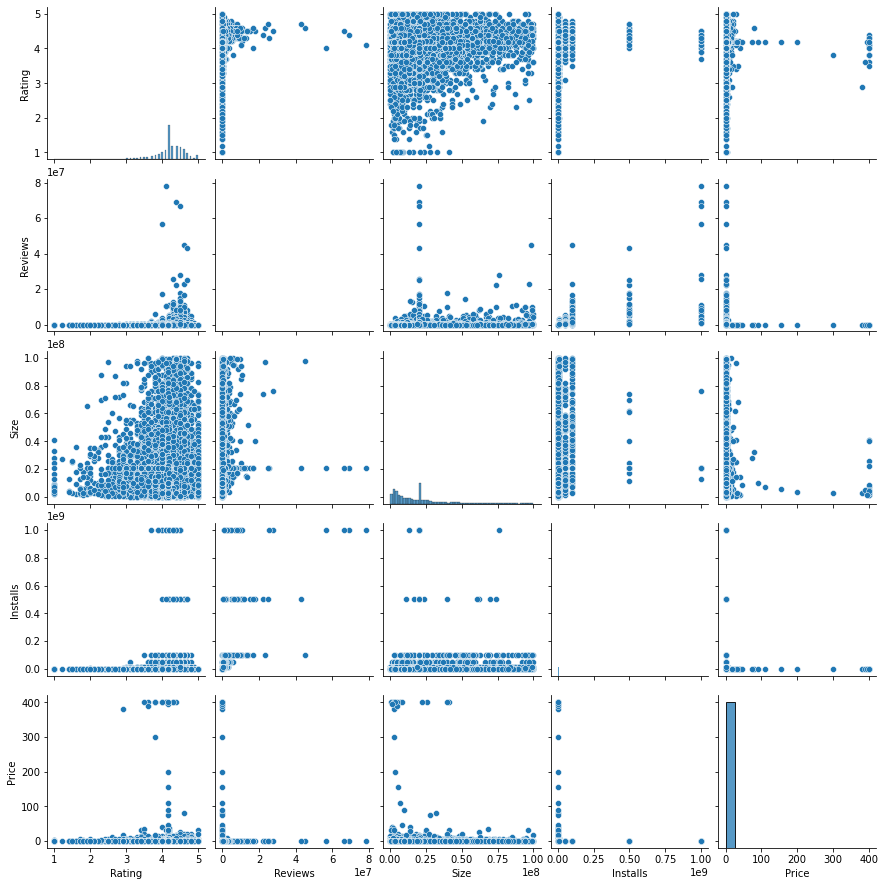

In [23]:
sns.pairplot(df);

Now we want ro see the distribution of each column and the count of its categories.

### Category

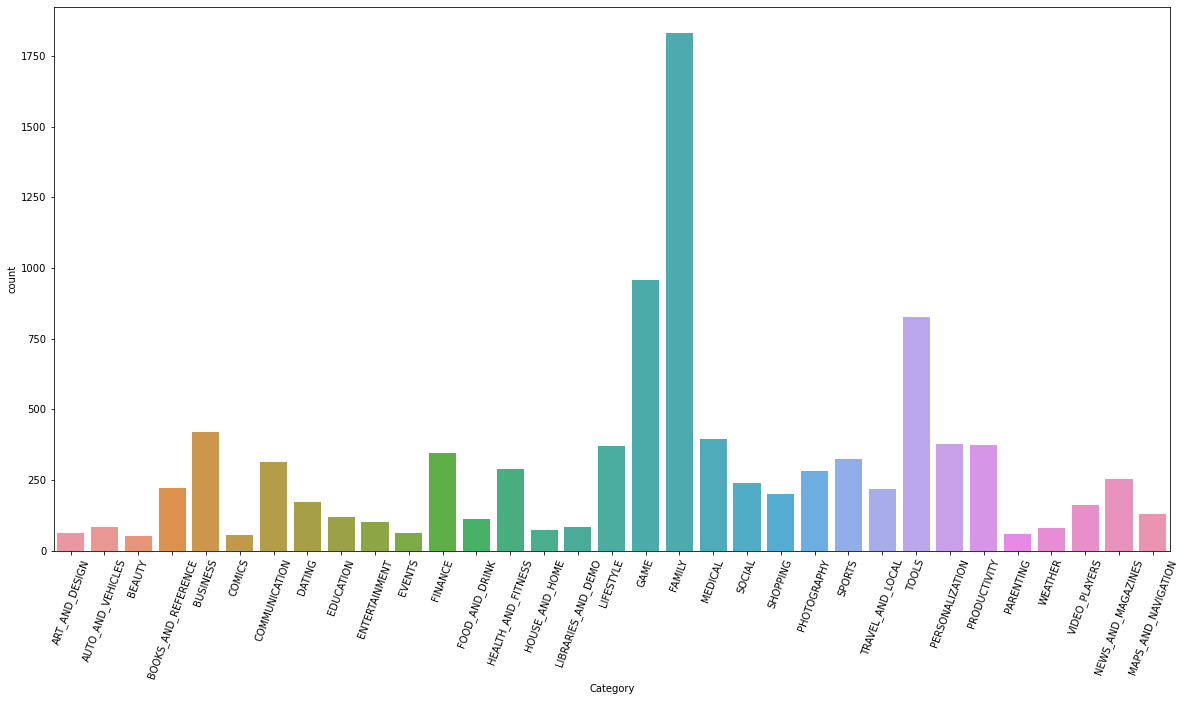

In [24]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=df)
plt.xticks(rotation=70);

### Rating

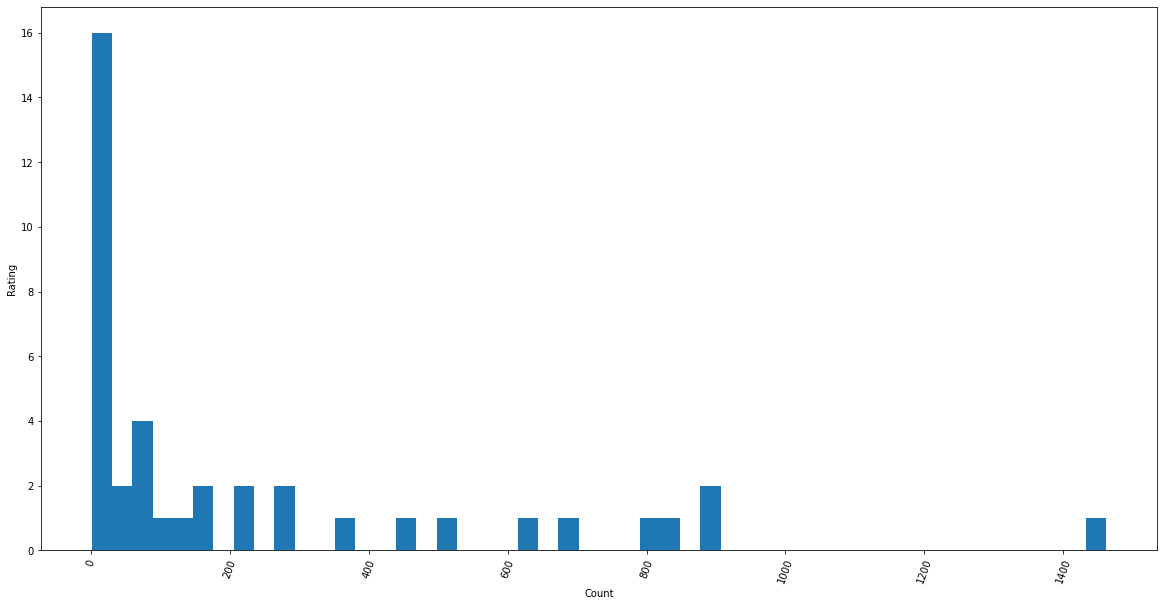

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
RA = df['Rating'].value_counts()
plt.hist(RA,50)
plt.xlabel('Count')
plt.ylabel('Rating')
plt.xticks(rotation=70);

### Reviews

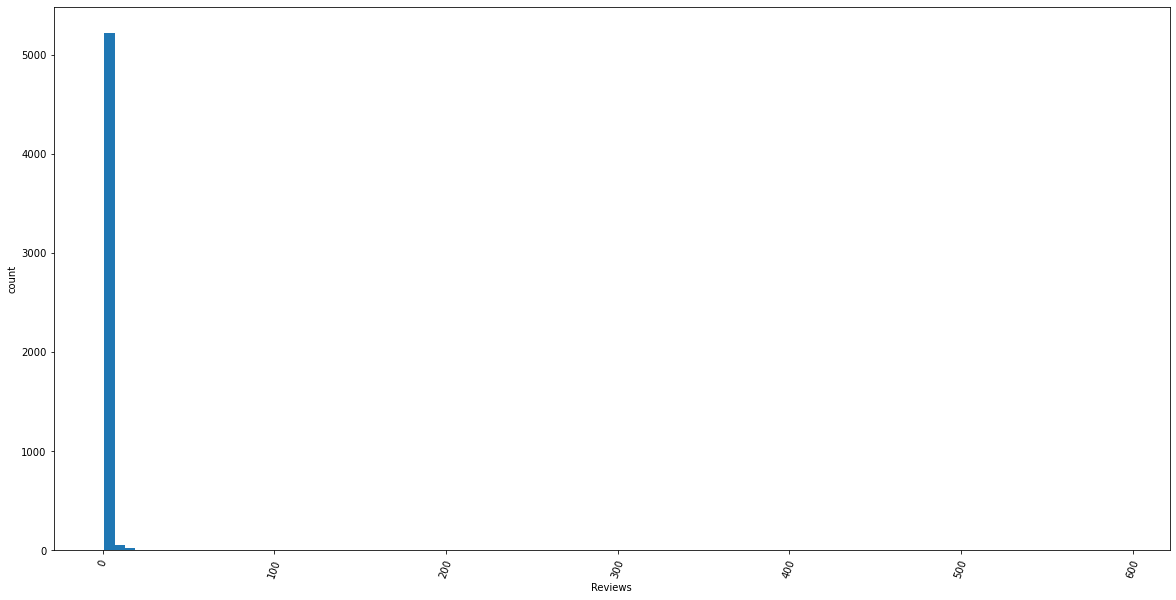

In [26]:
plt.rcParams['figure.figsize'] = (20, 10)
R = df['Reviews'].value_counts()
plt.hist(R, 100)
plt.xlabel('Reviews')
plt.ylabel('count')
plt.xticks(rotation=70);

### Size

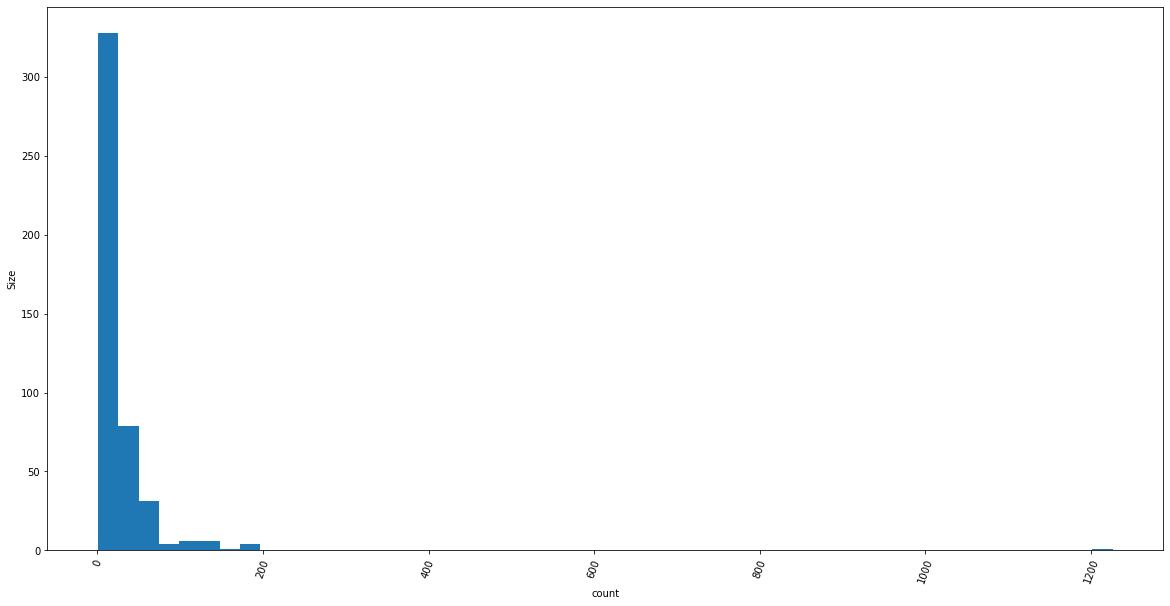

In [27]:
plt.rcParams['figure.figsize'] = (20, 10)
S= df['Size'].value_counts()
plt.hist(S, 50)
plt.xlabel('count')
plt.ylabel('Size')
plt.xticks(rotation=70);

### Installs

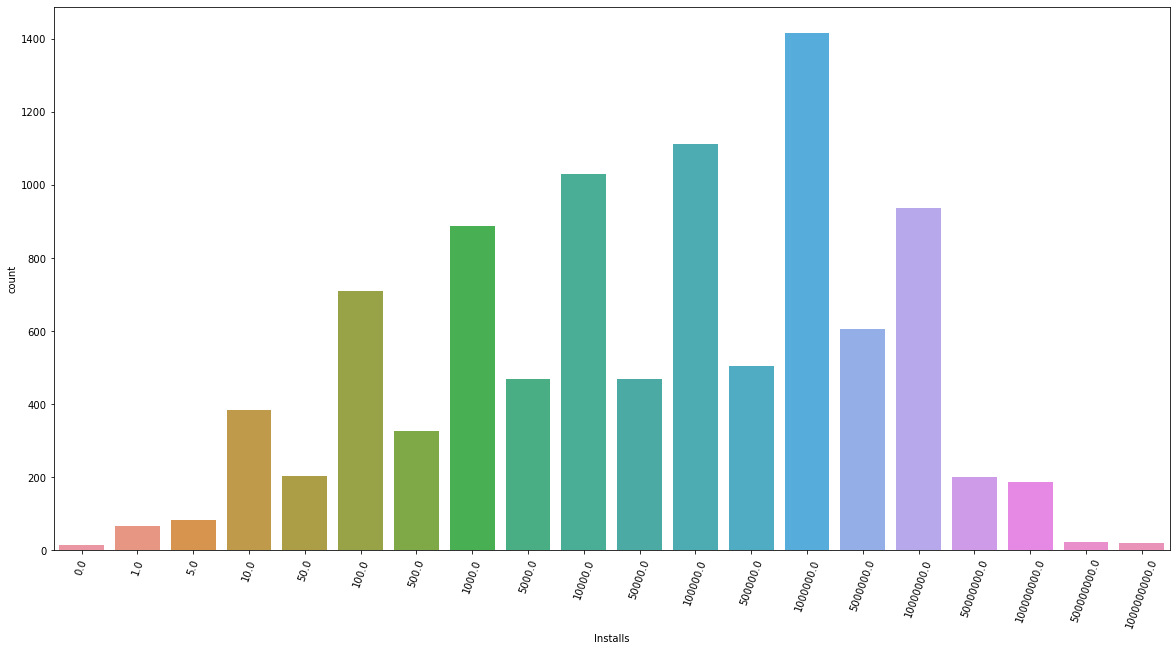

In [28]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Installs',data=df)
plt.xticks(rotation=70);

### Type

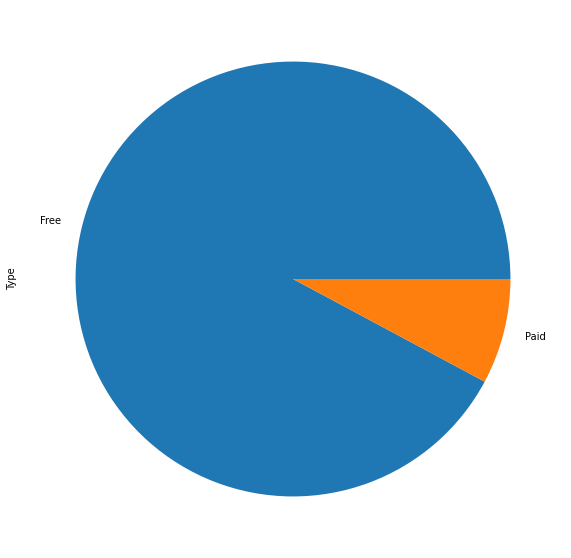

In [29]:
plt.rcParams['figure.figsize'] = (20, 10)
df['Type'].value_counts().plot.pie()
plt.xticks(rotation=70);

### Price

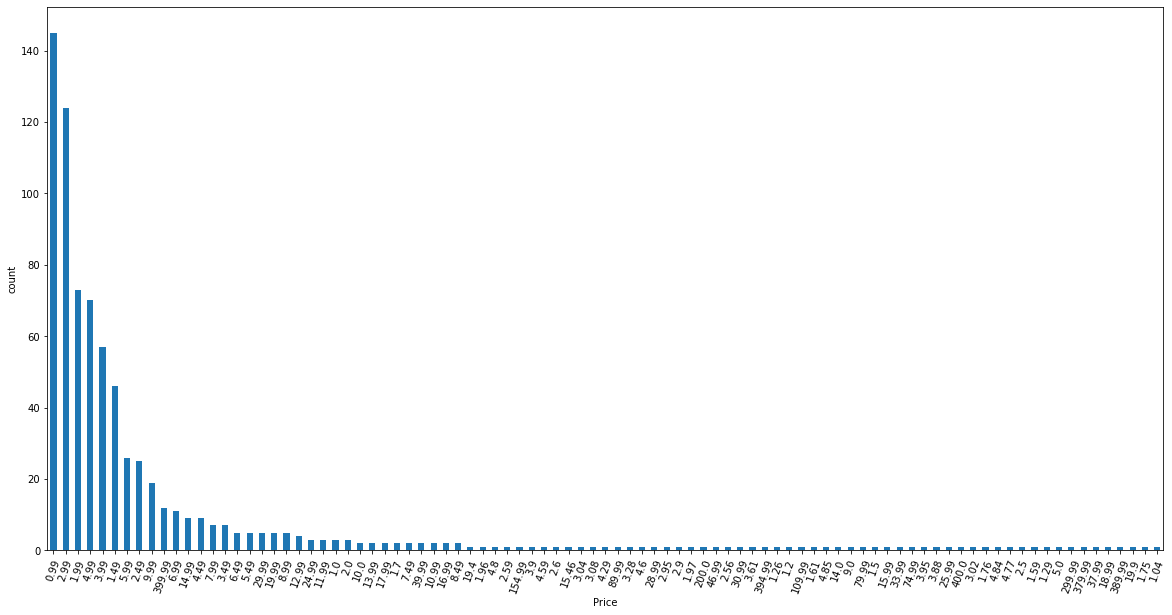

In [30]:
plt.rcParams['figure.figsize'] = (20, 10)
P = df.loc[(df.Type == 'Paid')]
P['Price'].value_counts().plot.bar()
plt.xlabel('Price')
plt.ylabel('count')
plt.xticks(rotation=70);

### Content Rating

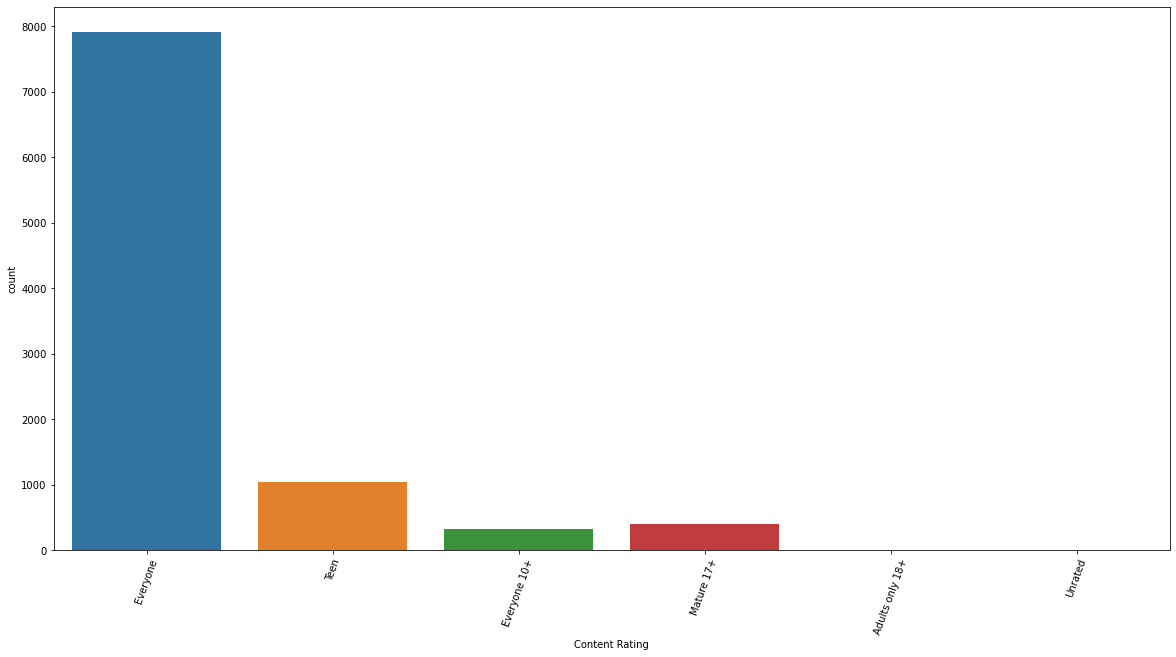

In [31]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Content Rating',data=df)
plt.xticks(rotation=70);

# 6. Feature Engineering

We want to add a new column called (App_Demand) engineered engineered from the 'Installs' and 'Rating' features. The column will have 7 categories ('very_high_demand' , 'high_demand', 'on_demand', 'moderate_demand', 'low_demand','very_low_demand','no_demand') which represent the demand on a certain app based on its installs and rating.

## 6.1. Calculations Related to New Column

We will compute maximum, average and minimum 'Installs' values, and average and minimum 'Rating' values using max(), mean(), and min() methods respectively. The approach compares the 'Installs' number and 'Rating' of each app with Maximum, Average, and Minimum Installs values and assigns the appropriate category for each app. These methods will be applied to the 'Installs' and 'Rating' features. In addition, we defined two variables (lowrRateIN) which denotes the average 'Installs' value between the minimum and average values. And (highRateIN) which denotes the average 'Installs' value between the maximum and average values.

In [32]:
avgIN = round(df['Installs'].mean(), 2)
maxiIN = round(df['Installs'].max(), 2)
miniIN = round(df['Installs'].min(), 2)

print ("Mean Value:", avgIN)
print ("Max Value:", maxiIN)
print ("Min Value:", miniIN)

lowRateIN = round((miniIN+avgIN)/2, 2)
print ("Below Average App - Cutoff:", lowRateIN)
highRateIN = round((avgIN+maxiIN)/2, 2)
print ("Above Average App - Cutoff:", highRateIN)

Mean Value: 7778312.02
Max Value: 1000000000.0
Min Value: 0.0
Below Average App - Cutoff: 3889156.01
Above Average App - Cutoff: 503889156.01


In [33]:
avgR = round(df['Rating'].mean(), 2)
miniR = round(df['Rating'].min(), 2)

print ("Mean Value:", avgR)
print ("Min Value:", miniR)

Mean Value: 4.17
Min Value: 1.0


## 6.2. Inserting the New Column

We want to classify apps into seven categories. First, the 'very_high_demand' apps are the app with the installs number between maximum and highRateIN values. Second, the 'high_demand' apps are the app with the installs number between highRateIN and average value and rating value above  average value. Third, the 'on_demand' apps are the app with the installs number between highRateIN and average values and rating value below  average value. Fourth, the 'moderate_demand' apps are the app with the installs number between average and lowrRateIN values. Fifth, 'low_demand' apps are the app with the installs number between lowrRateIN and minimum values and rating value above average value. Sixth, 'very_low_demand' apps are the app with the installs number between lowrRateIN and minimum values and rating value below average value. The last category, 'no_demand' apps are the app with the installs number equal to minimum values. The result is stored in a new column called (App_Demand) that is added to the dataset.

In [34]:
conditions = [
    (df['Installs'] <= maxiIN) & (df['Installs'] >= highRateIN),
    (df['Installs'] < highRateIN) & (df['Installs'] >= avgIN) & (df['Rating'] > avgR),
    (df['Installs'] < highRateIN) & (df['Installs'] >= avgIN) & (df['Rating'] <= avgR),
    (df['Installs'] < avgIN) & (df['Installs'] >= lowRateIN),
    (df['Installs'] < lowRateIN) & (df['Installs'] > miniIN) & (df['Rating'] > avgR),
    (df['Installs'] < lowRateIN) & (df['Installs'] > miniIN)& (df['Rating'] <= avgR),
    (df['Installs'] == miniIN)]
categories = ['very_high_demand' , 'high_demand', 'on_demand', 'moderate_demand', 'low_demand','very_low_demand',
              'no_demand'] 
df['App_Demand'] = np.select(conditions, categories)

#lets show the new column on the first 15 rows
df.head(15)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,App_Demand
0,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,very_low_demand
1,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,very_low_demand
2,ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,moderate_demand
3,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,high_demand
4,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,low_demand
5,ART_AND_DESIGN,4.4,167.0,5600000.0,50000.0,Free,0.0,Everyone,low_demand
6,ART_AND_DESIGN,3.8,178.0,19000000.0,50000.0,Free,0.0,Everyone,very_low_demand
7,ART_AND_DESIGN,4.1,36815.0,29000000.0,1000000.0,Free,0.0,Everyone,very_low_demand
8,ART_AND_DESIGN,4.4,13791.0,33000000.0,1000000.0,Free,0.0,Everyone,low_demand
9,ART_AND_DESIGN,4.7,121.0,3100000.0,10000.0,Free,0.0,Everyone,low_demand


As we have seen, the new 'App_Demand' column is added to our dataset.

In [35]:
#Use loc function to test the results
df.loc[(df['Installs'] <= maxiIN) & (df['Installs'] >= highRateIN)].head(3)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,App_Demand
152,BOOKS_AND_REFERENCE,3.9,1433233.0,2.039529e+07,1.000000e+09,Free,0.0,Teen,very_high_demand
299,COMMUNICATION,4.0,56642847.0,2.039529e+07,1.000000e+09,Free,0.0,Everyone,very_high_demand
300,COMMUNICATION,4.4,69119316.0,2.039529e+07,1.000000e+09,Free,0.0,Everyone,very_high_demand


## 6.3. Visualization of the Distribution

Now we will display the distribution of the apps as per their categories of demand.

/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hessaalhamad/opt/anac

<AxesSubplot:xlabel='Index', ylabel='App_Demand'>

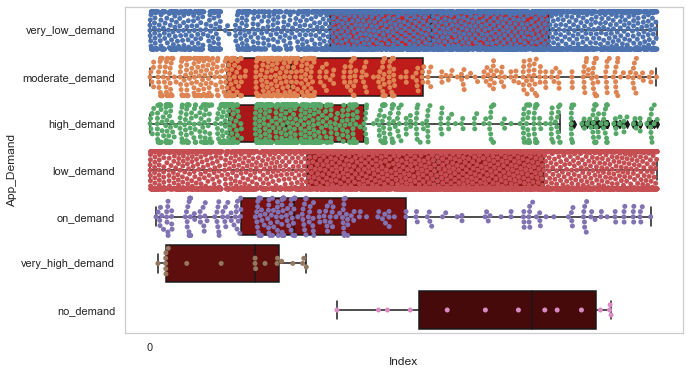

In [36]:
plt.figure(figsize=(10,6))
sns.set(context='notebook', style='whitegrid')
df['Index'] = df.index #converting index into column
sns.boxplot(x= 'Index', y= 'App_Demand', data= df, palette= 'flag')
sns.boxplot()
sns.swarmplot(x = 'Index', y= 'App_Demand', data= df, linewidth= 0)

We will drop the 'Index' as we no longer need it.

In [37]:
df = df.drop(['Index'], axis = 1)

Lets see a pair plot of the dataset with the target App_Demand

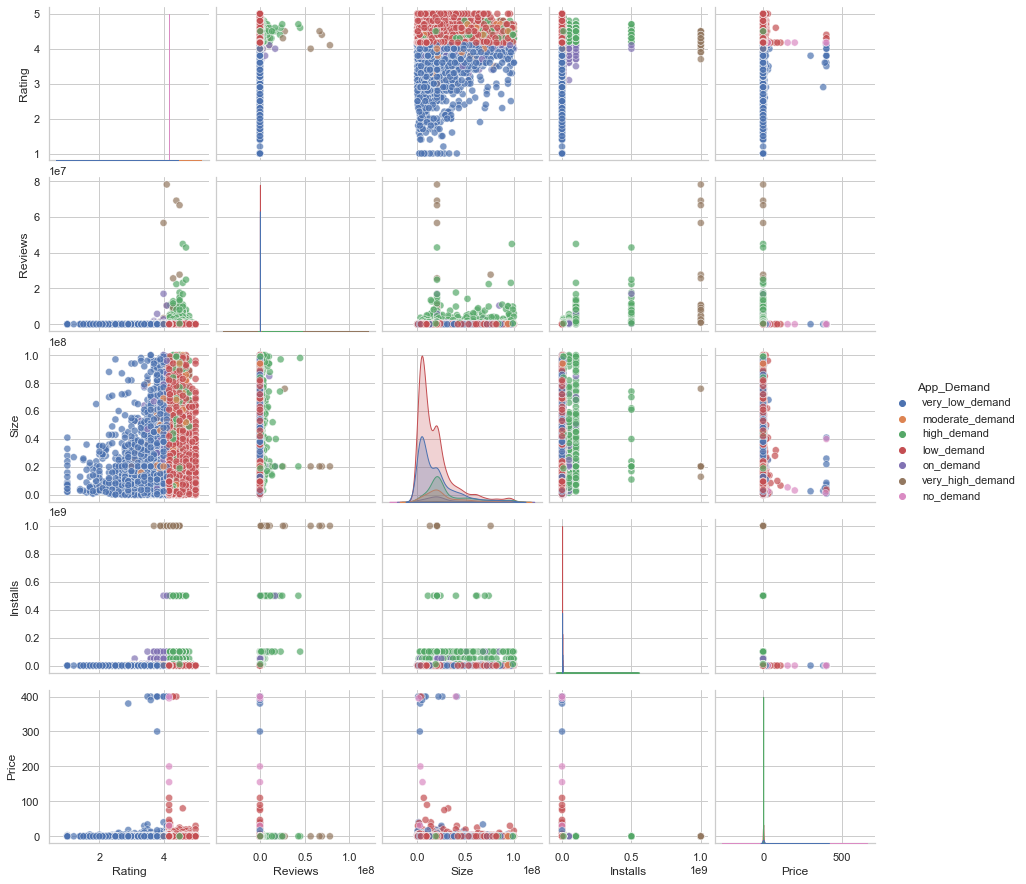

In [38]:
sns.pairplot(data = df,hue = 'App_Demand', plot_kws={'alpha':0.7 , 's':50}) 

# 7. Data Transformation

We know that we have some features with string values. Let's take a look into those distinguish values

In [39]:
print(df['Category'].value_counts())

FAMILY                 1831
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


In [40]:
print(df['Type'].value_counts())

Free    8902
Paid     756
Name: Type, dtype: int64


In [41]:
print(df['Content Rating'].value_counts())

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


In [42]:
print(df['App_Demand'].value_counts())

low_demand          5103
very_low_demand     2563
high_demand         1071
moderate_demand      607
on_demand            280
very_high_demand      20
no_demand             14
Name: App_Demand, dtype: int64


It is now important to encode categorical labels into numerical values. So, the values/labels in the 'Category', 'Type', 'Content Rating' and 'App_Demand' need to be transformed and normalized, such that they contain only numerical values. For instance, 'App_Demand' will contain only values between 0 and 6. For this purpose, we use the LabelEncoder from sklearn.preprocessing library and fit the categories on it to get the numeric values.

In [43]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df['Category'] = encode.fit_transform(df['Category'])

df['Type'] = encode.fit_transform(df['Type'])

df['Content Rating'] = encode.fit_transform(df['Content Rating'])

df['App_Demand'] = encode.fit_transform(df['App_Demand'])

In [44]:
df.head(3)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,App_Demand
0,0,4.1,159.0,19000000.0,10000.0,0,0.0,1,6
1,0,3.9,967.0,14000000.0,500000.0,0,0.0,1,6
2,0,4.7,87510.0,8700000.0,5000000.0,0,0.0,1,2


# 8. Correlation Matrix

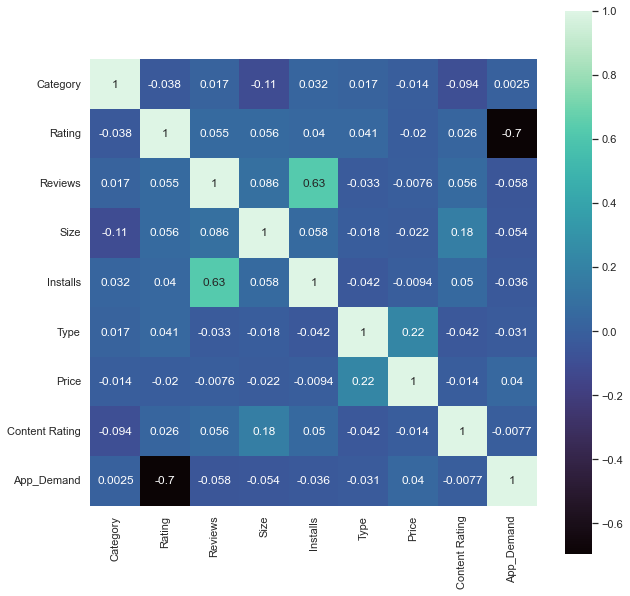

In [45]:
plt.figure(figsize=(10,10))
cormat = df.corr()
sns.heatmap(cormat, annot= True, cmap='mako', square= True);

We can notice that almost all the features have no relationship with the target of classification 'App_Demand'. We can already assume that the classification models won't work. But we will continue and see the results.

We can also see that the target of regression model 'Rating' has low relationship with the other features. We can also assume that we will have bad regression.

# 9. Building the Models

First, we plan to develop K-Nearest Neighbor and Random Forrest Classifier models for classifying the apps into categories based on their demand.
Second, we plan to develop a Random Forrest Regression model to predict the app rating.

## 9.1. Imorting the Libraries

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [47]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

## 9.2. Classification Goal

### 9.2.1. Set Features and Target 

We will specify X set of features and y feature which is the target. We will use features ('Category', 'Type', 'Price', 'Content Rating') as input variables, and the new feature (App_Demand) will be generated as output for our classification models. X will take all rows, and ('Category', 'Type', 'Price', 'Content Rating') columns. And y will take all rows, and only the last column 'App_Demand'.

In [48]:
X = df[['Category', 'Type', 'Price', 'Content Rating']]
y = df.iloc[:, -1]

In [49]:
X.head()

,Category,Type,Price,Content Rating
0,0,0,0.0,1
1,0,0,0.0,1
2,0,0,0.0,1
3,0,0,0.0,4
4,0,0,0.0,1


In [50]:
y.head()

0    6
1    6
2    2
3    0
4    1
Name: App_Demand, dtype: int64

### 9.2.2. Splitting the Dataset

The dataset must be split into a training set and testing set. We will use the train_test_split() method to do splitting. We will set the test_size parameter 0.30.

In [51]:
#hold out 30% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42, stratify=y)

### 9.2.3. Feature Scaling

Before fitting the model, we need to scales and translates each feature on the training set to be in range between 0 and 1.

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
scaler.fit(X_train)

MinMaxScaler()

### 9.2.4. Training and Evaluating the Models

### 9.2.4.1. K-Nearest Neighbor Classifier

#### Best Value of K Tuning Using Cross-Validation

In [54]:
#search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score

neighbors = list(range(0, 300, 5))
k_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 514, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator 

[nan, 0.4625739644970414, 0.4936390532544378, 0.5078402366863906, 0.5131656804733727, 0.5178994082840236, 0.5170118343195267, 0.5173076923076924, 0.5202662721893491, 0.5217455621301774, 0.5239644970414201, 0.5264792899408283, 0.525887573964497, 0.5235207100591716, 0.5235207100591717, 0.5230769230769232, 0.5238165680473373, 0.5261834319526627, 0.5260355029585798, 0.5247041420118344, 0.5235207100591716, 0.5247041420118344, 0.5245562130177515, 0.5254437869822484, 0.5267751479289939, 0.5273668639053255, 0.5275147928994082, 0.528698224852071, 0.5269230769230768, 0.5295857988165681, 0.5309171597633137, 0.5292899408284024, 0.5284023668639053, 0.5288461538461539, 0.5279585798816567, 0.5266272189349113, 0.5267751479289939, 0.526775147928994, 0.5272189349112426, 0.5267751479289942, 0.5285502958579882, 0.5281065088757397, 0.5278106508875741, 0.5270710059171598, 0.5272189349112427, 0.5270710059171598, 0.5270710059171598, 0.526923076923077, 0.5273668639053255, 0.5275147928994084, 0.5273668639053255

Text(0, 0.5, 'Cross-Validated Accuracy')

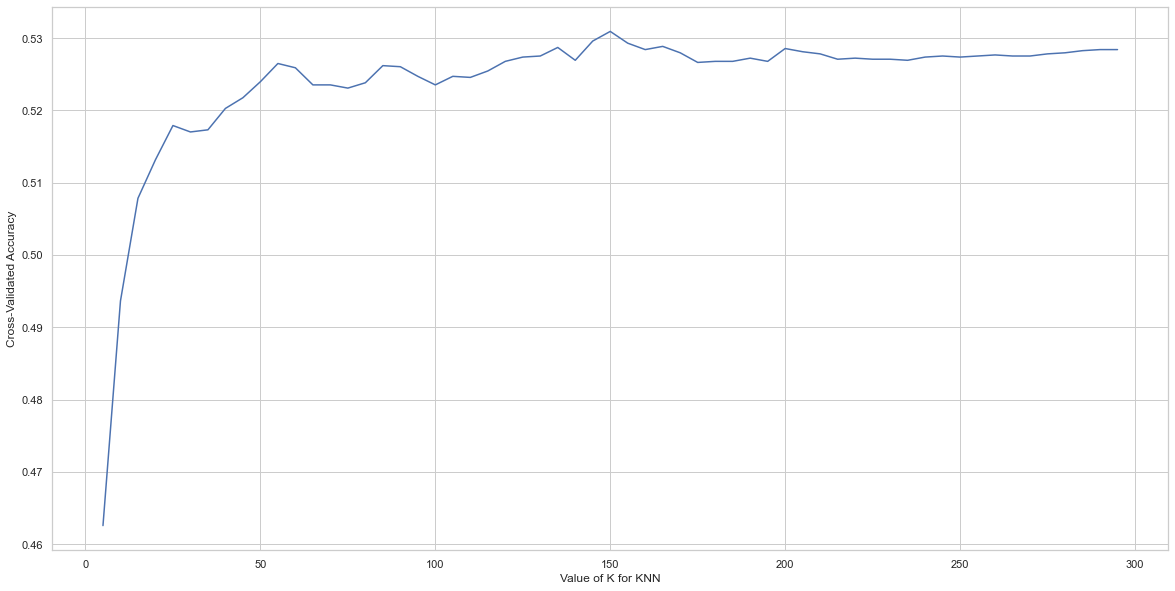

In [55]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
plt.plot(neighbors, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

The best result is nearly at k=145

#### Building the Model (1st Trial)

In [56]:
knn1 = KNeighborsClassifier(n_neighbors=150)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=150)

In [57]:
y_predknn1 = knn1.predict(X_test)

In [58]:
knn1.predict([[4, 1, 3, 2]])

array([1])

#### Evaluating the 1st Trial

In [59]:
print("KNN Training Set Accuracy:", metrics.accuracy_score(y_train, knn1.predict(X_train)))
print("KNN Testing Set Accuracy:", metrics.accuracy_score(y_test, y_predknn1))
print("Classification Report of KNN:\n", classification_report(y_test, y_predknn1))
print("Confusion Matrix of KNN:\n", confusion_matrix(y_test, y_predknn1))

KNN Training Set Accuracy: 0.531508875739645
KNN Testing Set Accuracy: 0.525879917184265
Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.27      0.10      0.15       322
           1       0.54      0.97      0.69      1531
           2       0.00      0.00      0.00       182
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        84
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00       769

    accuracy                           0.53      2898
   macro avg       0.12      0.15      0.12      2898
weighted avg       0.31      0.53      0.38      2898

Confusion Matrix of KNN:
 [[  33  289    0    0    0    0    0]
 [  38 1491    0    0    0    0    2]
 [   9  173    0    0    0    0    0]
 [   0    4    0    0    0    0    0]
 [   7   77    0    0    0    0    0]
 [   1    5    0    0    0    0    0]
 [  35  734    0    0    0   

/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

As shown in the confusion matrix; there is clearly a bias towards the class of 1. Which means that the dataset is maybe imbalanced.

#### Rsampling the Dataset Using SMOTE - Synthetic Minority Oversampling TEchnique

Let's take a look to the target class of our dataset

In [60]:
y.value_counts()

1    5103
6    2563
0    1071
2     607
4     280
5      20
3      14
Name: App_Demand, dtype: int64

In [61]:
y_train.value_counts()

1    3572
6    1794
0     749
2     425
4     196
5      14
3      10
Name: App_Demand, dtype: int64

We can notice that clearly the dataset is imbalanced. We will apply SMOTE - Synthetic Minority Oversampling TEchnique on the imbalanced dataset to resample it.

In [62]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_smoted, y_smoted =sm.fit_resample(X_train,y_train)

Now let's check the target class value counts

In [63]:
y_smoted.value_counts()

6    3572
2    3572
1    3572
4    3572
0    3572
5    3572
3    3572
Name: App_Demand, dtype: int64

#### Best Value of K Tuning Using Cross-Validation

In [64]:
#search for an optimal value of K for KNN
neighbors = list(range(1, 1000, 10))
k_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_smoted, y_smoted, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.3382266613354658, 0.360103606557377, 0.37246163934426224, 0.37474159136345464, 0.3799400719712115, 0.3759011275489804, 0.37382175129948025, 0.3727418632546981, 0.3705019432227109, 0.373061287485006, 0.37198117552978804, 0.3740205357856857, 0.3746204398240704, 0.37690026389444226, 0.37486040783686525, 0.3735405517792883, 0.3777398320671731, 0.3808987604958016, 0.3814993522590963, 0.3836189044382247, 0.383058856457417, 0.3840186005597761, 0.3832587445021991, 0.3817790323870452, 0.380259112355058, 0.37897903238704517, 0.37677964014394244, 0.3757395761695322, 0.3730601999200319, 0.3685009036385446, 0.3657812235105958, 0.36450136745301875, 0.3630215753698521, 0.35782261495401835, 0.3552629348260696, 0.3545431267493003, 0.3545830787684926, 0.35374311075569775, 0.3551427588964414, 0.3549828868452619, 0.35470299880047984, 0.35610287085165926, 0.35662267892842864, 0.35750240703718517, 0.35822253498600554, 0.3596225349860056, 0.36110266293482607, 0.3598229028388644, 0.35938293482606953, 0.359

Text(0, 0.5, 'Cross-Validated Accuracy')

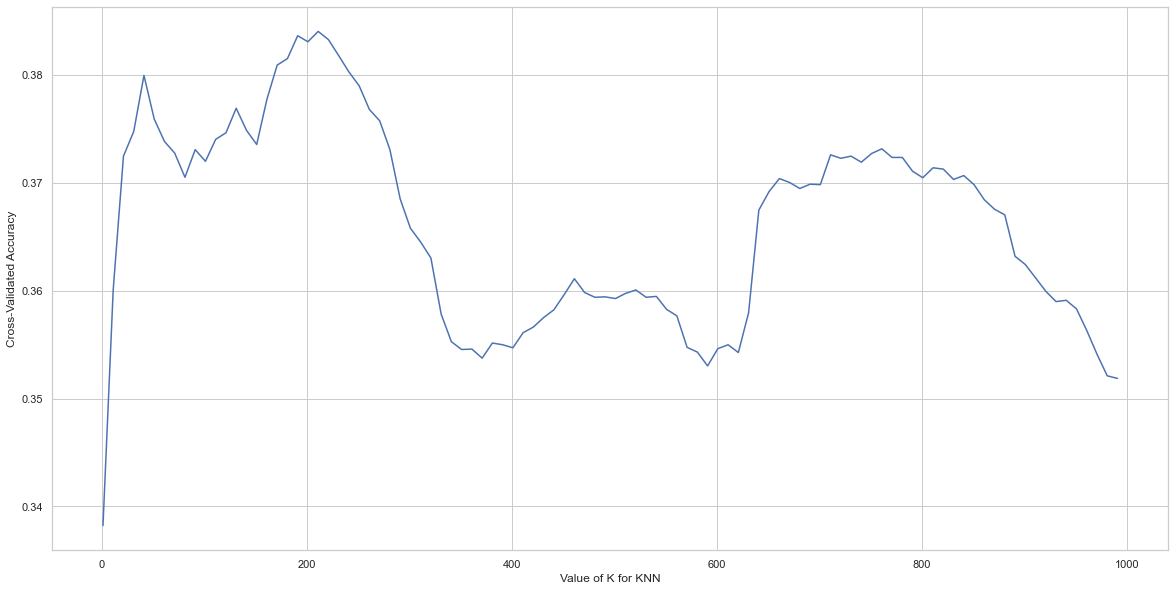

In [65]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
plt.plot(neighbors, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Building the Model (2nd Trial)

We will build the model now using resampled dataset

In [66]:
knn2 = KNeighborsClassifier(n_neighbors=220)
knn2.fit(X_smoted, y_smoted)

KNeighborsClassifier(n_neighbors=220)

In [67]:
y_predknn2 = knn2.predict(X_test)

#### Evaluating the 2nd Trial

In [68]:
print("KNN Training Set Accuracy:", metrics.accuracy_score(y_smoted, knn2.predict(X_smoted)))
print("KNN Testing Set Accuracy:", metrics.accuracy_score(y_test, y_predknn2))
print("Classification Report of KNN:\n", classification_report(y_test, y_predknn2))
print("Confusion Matrix of KNN:\n", confusion_matrix(y_test, y_predknn2))

KNN Training Set Accuracy: 0.3874980003199488
KNN Testing Set Accuracy: 0.3053830227743271
Classification Report of KNN:
               precision    recall  f1-score   support

           0       0.19      0.61      0.28       322
           1       0.61      0.41      0.49      1531
           2       0.09      0.17      0.12       182
           3       0.01      0.75      0.03         4
           4       0.04      0.02      0.03        84
           5       0.01      0.17      0.02         6
           6       0.32      0.04      0.07       769

    accuracy                           0.31      2898
   macro avg       0.18      0.31      0.15      2898
weighted avg       0.43      0.31      0.32      2898

Confusion Matrix of KNN:
 [[196  49  44   1   9  20   3]
 [445 623 176 170  16  47  54]
 [ 78  52  31   0   7  11   3]
 [  0   0   0   3   0   0   1]
 [ 47  19   9   0   2   7   0]
 [  4   1   0   0   0   1   0]
 [287 282  95  42  11  23  29]]


We somhow fixed the imbalance of the dataset, but the the accuracy is worse.

### 9.2.4.2. Random Forrest Classifier

#### Building the Model (1st Trial)

In [69]:
RF1 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
RF1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [71]:
y_predRF1 = RF1.predict(X_test)

#### Evaluating the 1st Trial

In [72]:
print("RF Training Set Accuracy:", metrics.accuracy_score(y_train, RF1.predict(X_train)))
print("RF Testing Set Accuracy:", metrics.accuracy_score(y_test, y_predRF1))
print("Classification Report of RF:\n", classification_report(y_test, y_predRF1))
print("Confusion Matrix of RF:\n", confusion_matrix(y_test, y_predRF1))

RF Training Set Accuracy: 0.5455621301775148
RF Testing Set Accuracy: 0.5158730158730159
Classification Report of RF:
               precision    recall  f1-score   support

           0       0.25      0.12      0.16       322
           1       0.54      0.92      0.68      1531
           2       0.00      0.00      0.00       182
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        84
           5       0.00      0.00      0.00         6
           6       0.31      0.06      0.10       769

    accuracy                           0.52      2898
   macro avg       0.16      0.16      0.14      2898
weighted avg       0.40      0.52      0.41      2898

Confusion Matrix of RF:
 [[  39  266    1    0    0    0   16]
 [  51 1411    1    0    0    0   68]
 [  14  155    0    0    0    0   13]
 [   0    4    0    0    0    0    0]
 [  13   66    0    0    0    0    5]
 [   2    4    0    0    0    0    0]
 [  40  683    1    0    0    0

/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hessaalhamad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

The Random Forrest performed almost as acccurate as KNN but with no bias towards the class of 1. But still, there are some missing classes. So, the model must be build on balanced dataset.

#### Building the Model (2nd Trial)

We will use (class weight) in Random Forest classifier to see if it solve the problem of imbalanced dataset

In [73]:
RF2 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42, class_weight= 'balanced')
RF2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=1000, random_state=42)

In [74]:
y_predRF2 = RF2.predict(X_test)

#### Evaluating the 2nd Trial

In [75]:
print("RF Training Set Accuracy:", metrics.accuracy_score(y_train, RF2.predict(X_train)))
print("RF Testing Set Accuracy:", metrics.accuracy_score(y_test, y_predRF2))
print("Classification Report of RF:\n", classification_report(y_test, y_predRF2))
print("Confusion Matrix of RF:\n", confusion_matrix(y_test, y_predRF2))

RF Training Set Accuracy: 0.28816568047337277
RF Testing Set Accuracy: 0.25086266390614215
Classification Report of RF:
               precision    recall  f1-score   support

           0       0.25      0.43      0.32       322
           1       0.73      0.21      0.33      1531
           2       0.07      0.13      0.09       182
           3       0.00      0.00      0.00         4
           4       0.05      0.24      0.08        84
           5       0.02      0.50      0.03         6
           6       0.29      0.29      0.29       769

    accuracy                           0.25      2898
   macro avg       0.20      0.26      0.16      2898
weighted avg       0.50      0.25      0.29      2898

Confusion Matrix of RF:
 [[139   8  51   4  51  30  39]
 [217 321 179 125 191  62 436]
 [ 40   9  24   4  32  27  46]
 [  0   3   0   0   0   0   1]
 [ 25   3   9   1  20  10  16]
 [  2   0   0   0   1   3   0]
 [129  96  80  52 138  54 220]]


We somhow fixed the imbalance of the dataset, but the the accuracy is also worse.

#### Building the Model (3rd Trial)

We will build the model now using resampled dataset

In [76]:
RF3 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
RF3.fit(X_smoted, y_smoted)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [77]:
y_predRF3 = RF3.predict(X_test)

#### Evaluating the 3rd Trial

In [78]:
print("RF Training Set Accuracy:", metrics.accuracy_score(y_smoted, RF2.predict(X_smoted)))
print("RF Testing Set Accuracy:", metrics.accuracy_score(y_test, y_predRF3))
print("Classification Report of RF:\n", classification_report(y_test, y_predRF3))
print("Confusion Matrix of RF:\n", confusion_matrix(y_test, y_predRF3))

RF Training Set Accuracy: 0.28943369060950247
RF Testing Set Accuracy: 0.28778467908902694
Classification Report of RF:
               precision    recall  f1-score   support

           0       0.25      0.42      0.31       322
           1       0.71      0.28      0.40      1531
           2       0.07      0.13      0.09       182
           3       0.11      0.75      0.19         4
           4       0.06      0.29      0.09        84
           5       0.02      0.50      0.03         6
           6       0.29      0.28      0.29       769

    accuracy                           0.29      2898
   macro avg       0.21      0.38      0.20      2898
weighted avg       0.49      0.29      0.33      2898

Confusion Matrix of RF:
 [[135  12  53   2  51  34  35]
 [219 429 181  18 183  72 429]
 [ 43  14  24   0  34  22  45]
 [  0   1   0   3   0   0   0]
 [ 23   3   9   0  24   9  16]
 [  1   0   1   0   1   3   0]
 [129 141  79   4 143  57 216]]


Although the testing set performed better than the second trial; the results are still not good.

## 9.3. Regression Goal

#### Data Transformation

Before building the regression model, we need to log-transform the 'Installs' column, in order to make it more 'Normal'. 
Since there are apps with 0 installs, we wil transform it with log(x+1) transform.

In [79]:
df['Installs']=np.log(df['Installs'] + 1)

#### Target Values

Now, let's check the value counts of the 'Rating' column

In [80]:
df['Rating'].value_counts()

4.175052    1462
4.300000     897
4.400000     895
4.500000     848
4.200000     810
4.600000     683
4.100000     621
4.000000     513
4.700000     442
3.900000     359
3.800000     286
5.000000     271
3.700000     224
4.800000     221
3.600000     167
3.500000     156
3.400000     126
3.300000     100
4.900000      85
3.000000      81
3.100000      69
3.200000      63
2.900000      45
2.800000      40
2.600000      24
2.700000      23
2.500000      20
2.300000      20
2.400000      19
1.000000      16
2.200000      14
2.000000      12
1.900000      11
1.700000       8
1.800000       8
2.100000       8
1.600000       4
1.400000       3
1.500000       3
1.200000       1
Name: Rating, dtype: int64

There is only one data point with the value '1.200000'. This could make the learning model bias and not fit. So, we need to drop it.

In [81]:
#We need to locate it
df.loc[(df['Rating'] == 1.200000)]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,App_Demand
8922,12,1.2,44.0,27000000.0,6.908755,0,0.0,1,6


In [82]:
#Need to be dropped
df= df.drop(8922)

In [83]:
#Check the value counts again
df['Rating'].value_counts()

4.175052    1462
4.300000     897
4.400000     895
4.500000     848
4.200000     810
4.600000     683
4.100000     621
4.000000     513
4.700000     442
3.900000     359
3.800000     286
5.000000     271
3.700000     224
4.800000     221
3.600000     167
3.500000     156
3.400000     126
3.300000     100
4.900000      85
3.000000      81
3.100000      69
3.200000      63
2.900000      45
2.800000      40
2.600000      24
2.700000      23
2.500000      20
2.300000      20
2.400000      19
1.000000      16
2.200000      14
2.000000      12
1.900000      11
1.700000       8
1.800000       8
2.100000       8
1.600000       4
1.400000       3
1.500000       3
Name: Rating, dtype: int64

### 9.3.1. Set Features and Target

We will specify X set of fetures and y feature which is the target. We will all remaining features exept ('Rating' and 'App_Demand') as input variables, and the  feature (Rating) will be generated as output for our regression model. X will take all rows, and all columns expect tha new one 'App_Demand' and the 'Rating' column because it's the output(y). And y will take all rows, and only the column 'Rating'.

In [84]:
X1 =df.drop(['Rating','App_Demand'] , axis = 1)
y1 =df['Rating']

### 9.3.2. Splitting the Dataset

The dataset must be split into a training set and testing set. We will use the train_test_split() method to do splitting. We will set the test_size parameter 0.30 for now, later on, we will run many experiments with different amounts of the test_size parameter.

In [85]:
#hold out 30% of the data for final testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=.30, random_state=42)

###  9.3.3. Features Scaling

Before fitting the model, we need to scales and translates each feature on the training set to be in range between 0 and 1.

In [86]:
scaler = MinMaxScaler()

In [87]:
scaler.fit(X_train1)

MinMaxScaler()

In [89]:
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

### 9.3.4. Training and Evaluating the Models

#### Building the Model

In [90]:
RFR1 = RandomForestRegressor()
RFR1.fit(X_train1,y_train1)

RandomForestRegressor()

In [91]:
y_predRFR1 = RFR1.predict(X_test1)

In [92]:
RFR1.predict([[4, 3, 4, 50000, 1, 3, 2]])

array([4.427])

#### Evaluating the Model

In [93]:
mseRFR1 = mean_squared_error(y_test1, y_predRFR1)
print("RMSE using RFR: ", np.sqrt(mseRFR1))

RMSE using RFR:  0.46971027534528054


### 9.3.5. Different Splitting of the Dataset.

In these experiments, we will change the dataset split size for the regression model each time to see if the results are affected by the way of split or not.

#### Training set > Testing set (15)

In [96]:
#hold out 15% of the data for final testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=.15, random_state=42)

In [97]:
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [98]:
RFR2 = RandomForestRegressor()
RFR2.fit(X_train1,y_train1)

RandomForestRegressor()

In [99]:
y_predRFR2 = RFR2.predict(X_test1)

In [100]:
mseRFR2 = mean_squared_error(y_test1, y_predRFR2)
print("RMSE using RFR: ", np.sqrt(mseRFR2))

RMSE using RFR:  0.45493198981234695


#### Training set = Testing set (50)

In [101]:
#hold out 50% of the data for final testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=.50, random_state=42)

In [102]:
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [103]:
RFR3 = RandomForestRegressor()
RFR3.fit(X_train1,y_train1)

RandomForestRegressor()

In [104]:
y_predRFR3 = RFR3.predict(X_test1)

In [105]:
mseRFR3 = mean_squared_error(y_test1, y_predRFR3)
print("RMSE using RFR: ", np.sqrt(mseRFR3))

RMSE using RFR:  0.49064546580455526


#### Training set < Testing set (75)

In [106]:
#hold out 75% of the data for final testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=.75, random_state=42)

In [107]:
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [108]:
RFR4 = RandomForestRegressor()
RFR4.fit(X_train1,y_train1)

RandomForestRegressor()

In [109]:
y_predRFR4 = RFR4.predict(X_test1)

In [110]:
mseRFR4 = mean_squared_error(y_test1, y_predRFR4)
print("RMSE using RFR: ", np.sqrt(mseRFR4))

RMSE using RFR:  0.49109259386519327


Now let's visulize the testing set size VS. regression RMSE

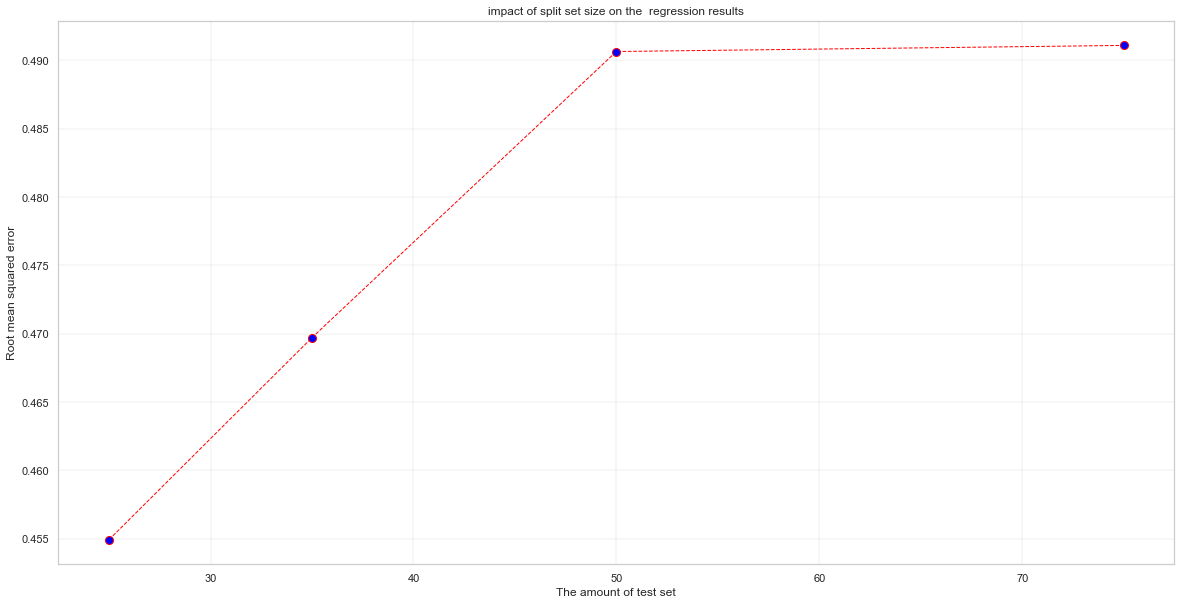

In [111]:
# x axis values 
a = [25, 35, 50, 75] #the test set size
#corresponding y axis values 
b = [np.sqrt(mseRFR2), np.sqrt(mseRFR1), np.sqrt(mseRFR3), np.sqrt(mseRFR4)] #refression results

  
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.plot(a, b, color='red', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=8) 
  
#naming the x axis 
plt.xlabel('The amount of test set') 
# naming the y axis 
plt.ylabel('Root mean squared error') 
  
#giving a title to my graph 
plt.title('impact of split set size on the  regression results') 
  
#function to show the plot 
plt.show()

The above figure shows that the RMSE is at its lowest at the less test size which means that it gave the best regression.

# 10. Tools

In this projest, we used the following tools:
- Anaconda Navigator 2.1.1/ Jupyter Notebook 6.4.5 for implementing both algorithms and creating the models. 
- Set of libraries for modeling and visualization. In principle we are going to import these libraries :
( Panda, Numpy, Matpoltlib, Seaborn, Scikit-learn).

# 11. Conclusions

Depending on this dataset we could not predict the demand of apps based on their category, type, price and content rating. We attribute that to some reasons:

- The dataset is highly imbalanced.
- There were no strong relationships among features.

Regarding the predicting of the rating, we –somehow- reach some reasonable results. For further, we suggest building different regression algorithms to find the best result.